# National Basketbal Association (2014 - 2015)

###### Importing Packages

In [758]:
import pandas as pd
from bokeh.plotting import figure, ColumnDataSource, show
from bokeh.models import HoverTool
from bokeh.io import output_notebook
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(context="paper", font="monospace")
from numpy import corrcoef, sum, log, arange
from numpy.random import rand
from pylab import pcolor, show, colorbar, xticks, yticks

import requests
from lxml import html

%matplotlib inline
output_notebook()

Loading BokehJS ...

###### Importing csv and understanding the DataFrame basics

In [759]:
main_df = pd.read_csv('input/shot_logs.csv', header=0)
main_df.shape

(128069, 21)

In [760]:
main_df.columns

Index([u'GAME_ID', u'MATCHUP', u'LOCATION', u'W', u'FINAL_MARGIN',
       u'SHOT_NUMBER', u'PERIOD', u'GAME_CLOCK', u'SHOT_CLOCK', u'DRIBBLES',
       u'TOUCH_TIME', u'SHOT_DIST', u'PTS_TYPE', u'SHOT_RESULT',
       u'CLOSEST_DEFENDER', u'CLOSEST_DEFENDER_PLAYER_ID', u'CLOSE_DEF_DIST',
       u'FGM', u'PTS', u'player_name', u'player_id'],
      dtype='object')

In [761]:
main_df.head(2)

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148


In [762]:
main_df.PERIOD.unique()

array([1, 2, 4, 3, 5, 6, 7])

###### Filling Missing Values - NAN

In [763]:
main_df = main_df.fillna(0)

###### Creating DataFrame of Players for Player Analysis

In [764]:
defplayer_df = pd.concat([main_df['CLOSEST_DEFENDER_PLAYER_ID'], main_df['CLOSEST_DEFENDER']], \
                         axis=1, keys=['PLAYER_ID', 'PLAYER'])
defplayer_df = defplayer_df.drop_duplicates()

In [765]:
offplayer_df = pd.concat([main_df['player_id'], main_df['player_name']], \
                         axis=1, keys=['PLAYER_ID', 'PLAYER'])
offplayer_df = offplayer_df.drop_duplicates()
offplayer_df.head()

,PLAYER_ID,PLAYER
0,203148,brian roberts
372,202687,bismack biyombo
486,2744,al jefferson
1286,203469,cody zeller
1641,202390,gary neal


## Player Analysis

### Top 10 Players by Field Goal %

In [766]:
for index, row in offplayer_df.iterrows():
    playerid = row['PLAYER_ID']
    
    offplayer_df.loc[(offplayer_df['PLAYER_ID'] == playerid), 'FGA'] = \
    main_df[(main_df['player_id'] == playerid)]['player_id'].count()
    
    offplayer_df.loc[(offplayer_df['PLAYER_ID'] == playerid), 'FGM'] = \
    main_df[(main_df['player_id'] == playerid) & (main_df['SHOT_RESULT'] == 'made')]['player_id'].count()
    
    offplayer_df['FG%'] = (offplayer_df['FGM'] / offplayer_df['FGA'])

In [767]:
mostshooters = offplayer_df.sort_values(['FGA'], ascending=[False])
mostshooters100 = mostshooters.head(100)
topshooters = mostshooters100.sort_values(['FG%'], ascending=[False])
topshooters10 = topshooters.head(10)
topshooters10

,PLAYER_ID,PLAYER,FGA,FGM,FG%
22432,101162,marcin gortat,570.0,311.0,0.545614
6443,202324,derrick favors,677.0,369.0,0.545052
29750,203076,anthony davis,841.0,457.0,0.543401
17888,201143,al horford,715.0,387.0,0.541259
43296,202696,nikola vucevic,902.0,480.0,0.532151
8675,2430,carlos boozer,620.0,319.0,0.514516
91618,202700,donatas motiejunas,576.0,293.0,0.508681
88586,203083,andre drummond,665.0,338.0,0.508271
66622,201609,goran dragic,753.0,378.0,0.501992
110077,201933,blake griffin,893.0,447.0,0.500560


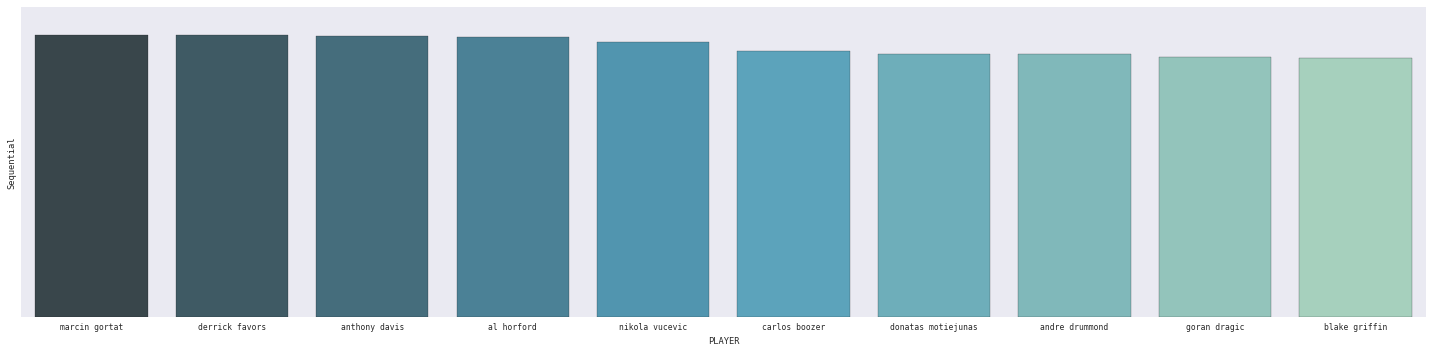

In [768]:
f, (ax1) = plt.subplots(1, 1, figsize=(20, 5), sharex=True)
a = sns.barplot(topshooters10['PLAYER'], topshooters10['FG%'], palette="GnBu_d", ax=ax1)
ax1.set_ylabel("Sequential")
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=5)

###### The top three 3-Point Shooters by FG% in the NBA in 2014 - 15 are Marcin Gortat (Washington Wizards), Derrick Rose (Chicago Bulls) and Anthony Davis (New Orleans Pelicans).

### Top 10 3PT Shooters by 3-Point Field Goal Percentage

In [769]:
for index, row in offplayer_df.iterrows():
    playerid = row['PLAYER_ID']
    
    offplayer_df.loc[(offplayer_df['PLAYER_ID'] == playerid), '3PA'] = \
    main_df[(main_df['player_id'] == playerid) & (main_df['PTS_TYPE'] == 3)]['player_id'].count()
    
    offplayer_df.loc[(offplayer_df['PLAYER_ID'] == playerid), '3PM'] = \
    main_df[(main_df['player_id'] == playerid) & (main_df['SHOT_RESULT'] == 'made') & (main_df['PTS_TYPE'] == 3)]\
    ['player_id'].count()
    
    offplayer_df['3P%'] = (offplayer_df['3PM'] / offplayer_df['3PA'])

In [770]:
mostshooters = offplayer_df.sort_values(['3PA'], ascending=[False])
mostshooters100 = mostshooters.head(100)
topshooters = mostshooters100.sort_values(['3P%'], ascending=[False])
topshooters10 = topshooters.head(10)
topshooters10

,PLAYER_ID,PLAYER,FGA,FGM,FG%,3PA,3PM,3P%
20013,2594,kyle korver,478.0,235.0,0.491632,355.0,176.0,0.495775
81275,201584,courtney lee,476.0,225.0,0.472689,171.0,75.0,0.438596
15022,202691,klay thompson,971.0,449.0,0.462410,407.0,177.0,0.434889
107558,200755,jj redick,649.0,299.0,0.460709,329.0,140.0,0.425532
23683,203078,bradley beal,583.0,243.0,0.416810,181.0,76.0,0.419890
14054,201939,stephen curry,968.0,470.0,0.485537,456.0,190.0,0.416667
75367,201162,jared dudley,359.0,173.0,0.481894,162.0,67.0,0.413580
77125,203114,khris middleton,562.0,265.0,0.471530,170.0,70.0,0.411765
114842,201166,aaron brooks,561.0,233.0,0.415330,218.0,89.0,0.408257
44663,202681,kyrie irving,942.0,439.0,0.466030,297.0,120.0,0.404040


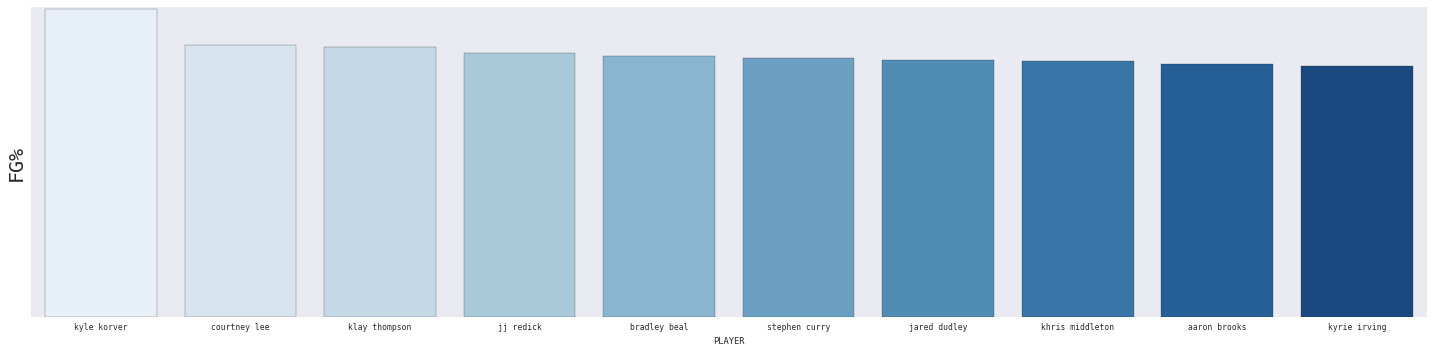

In [771]:
f, (ax1) = plt.subplots(1, 1, figsize=(20, 5), sharex=True)
a = sns.barplot(topshooters10['PLAYER'], topshooters10['3P%'], palette="Blues", ax=ax1)
ax1.set_ylabel("FG%", fontsize = '20')
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=5)

###### The top three 3-Point Shooters by FG% in the NBA in 2014 - 15 are Kyle Krover (Atlanta Hawks), Courtney Lee (New York Knicks) and Klay Thompson (Golden State Warriors) 

### Game Winning Shots

In [772]:
#gwinshotsn = main_df[main_df['PERIOD'] == 4]
#gwinshotsn = gwinshotsn[gwinshotsn['W'] == 'W']
gwinshotsn = main_df[main_df['GAME_CLOCK'] == '11:57']
#gwinshotsn = main_df[(main_df['FINAL_MARGIN'] == 1) | (main_df['FINAL_MARGIN'] == 2) |\
#                                   (main_df['FINAL_MARGIN'] == 3)]
gwinshotsn.shape

(5, 21)

In [773]:
main_df.columns

Index([u'GAME_ID', u'MATCHUP', u'LOCATION', u'W', u'FINAL_MARGIN',
       u'SHOT_NUMBER', u'PERIOD', u'GAME_CLOCK', u'SHOT_CLOCK', u'DRIBBLES',
       u'TOUCH_TIME', u'SHOT_DIST', u'PTS_TYPE', u'SHOT_RESULT',
       u'CLOSEST_DEFENDER', u'CLOSEST_DEFENDER_PLAYER_ID', u'CLOSE_DEF_DIST',
       u'FGM', u'PTS', u'player_name', u'player_id'],
      dtype='object')

In [774]:
main_df.SHOT_NUMBER.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38])

## Home and Away Analysis

In [775]:
homeshots = main_df[main_df['LOCATION'] == "H"]
awayshots = main_df[main_df['LOCATION'] == "A"]

### Correlation between Home and Away Field Goals

In [776]:
HFGA = len(homeshots['player_id'])
HFGM = len(homeshots[homeshots['FGM'] == 1])
HFGPer = float(HFGM)/HFGA

AFGA = len(awayshots['player_id'])
AFGM = len(awayshots[awayshots['FGM'] == 1])
AFGPer = float(AFGM)/AFGA
GameFGPer = AFGPer + HFGPer

([<matplotlib.patches.Wedge at 0x1c3fa8e90>,
  <matplotlib.text.Text at 0x1c4111b10>])

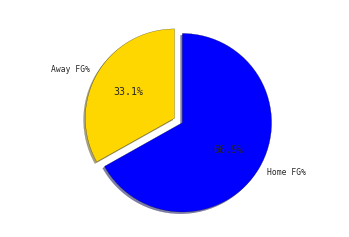

In [777]:
labels = 'Away FG%', 'Home FG%'
sizes = [AFGPer, GameFGPer]
colors = ['gold', 'blue']
explode = (0, 0.1)  # only "explode" the 2nd slice

plt.axis('equal')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

###### Calculating Home and Away FG%

In [778]:
for index, row in offplayer_df.iterrows():
    playerid = row['PLAYER_ID']
    
    offplayer_df.loc[(offplayer_df['PLAYER_ID'] == playerid), 'HFGA'] = \
    homeshots[(homeshots['player_id'] == playerid)]['player_id'].count()
    
    offplayer_df.loc[(offplayer_df['PLAYER_ID'] == playerid), 'HFGM'] = \
    homeshots[(homeshots['player_id'] == playerid) & (homeshots['SHOT_RESULT'] == 'made')]['player_id'].count()
    
    offplayer_df['HFG%'] = (offplayer_df['HFGM'] / offplayer_df['HFGA'])
    
for index, row in offplayer_df.iterrows():
    playerid = row['PLAYER_ID']
    
    offplayer_df.loc[(offplayer_df['PLAYER_ID'] == playerid), 'AFGA'] = \
    awayshots[(awayshots['player_id'] == playerid)]['player_id'].count()
    
    offplayer_df.loc[(offplayer_df['PLAYER_ID'] == playerid), 'AFGM'] = \
    awayshots[(awayshots['player_id'] == playerid) & (awayshots['SHOT_RESULT'] == 'made')]['player_id'].count()
    
    offplayer_df['AFG%'] = (offplayer_df['AFGM'] / offplayer_df['AFGA'])

In [779]:
offplayer_df0 = offplayer_df.dropna(0)
offplayer_df0 = offplayer_df0[offplayer_df0['FG%'] < 0.7]

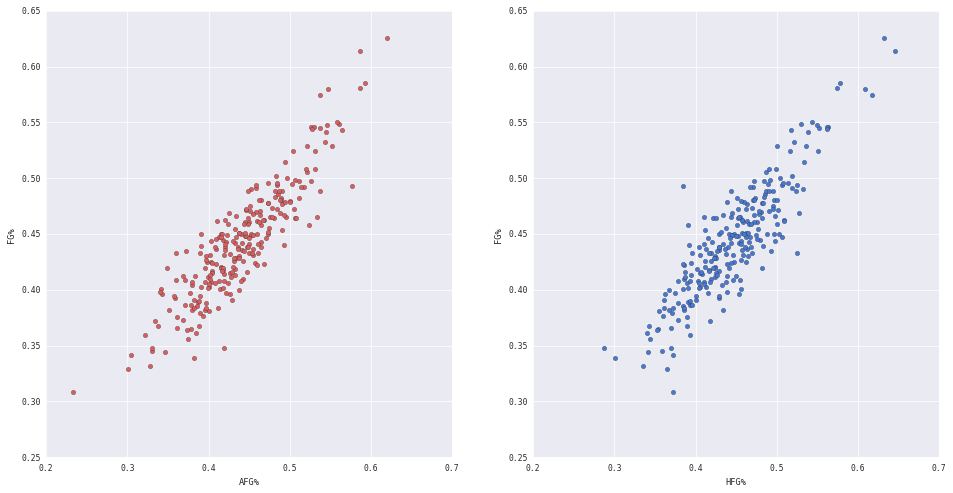

In [780]:
fig, (axis1,axis2) = plt.subplots(1,2, sharex=True,figsize=(16,8))
offplayer_df0.plot('AFG%', 'FG%', kind= 'scatter', ax=axis1, color = 'r')
offplayer_df0.plot('HFG%', 'FG%', kind= 'scatter', ax=axis2, color = 'b')

#sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
#f, axes = plt.plot(offplayer_df0['AFG%'], offplayer_df0['HFG%'])
#sns.despine(left=True)

# Plot a filled kernel density estimate
#sns.distplot(offplayer_df0['AFG%'], hist=False, color="b", kde_kws={"shade": True}, ax=axes[1, 0])

#plt.setp(axes, yticks=[])
#plt.tight_layout()

###### The Graph clearly shows a higher correlation between the Home Field Goals Percentage vs the overall Field Goal Percentage

In [781]:
main_df['MONTH'] = main_df['MATCHUP'].apply(lambda x:x.split()[0])
main_df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id,MONTH
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148,MAR
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148,MAR
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,0.0,3,...,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148,MAR
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148,MAR
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148,MAR


In [782]:
main_df.MONTH.unique()

array(['MAR', 'FEB', 'JAN', 'DEC', 'NOV', 'OCT'], dtype=object)

In [783]:
main_df = main_df.replace(to_replace = 'OCT', value = 1)
main_df = main_df.replace(to_replace = 'NOV', value = 2)
main_df = main_df.replace(to_replace = 'DEC', value = 3)
main_df = main_df.replace(to_replace = 'JAN', value = 4)
main_df = main_df.replace(to_replace = 'FEB', value = 5)
main_df = main_df.replace(to_replace = 'MAR', value = 6)
main_df.head(1)

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id,MONTH
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148,6


In [784]:
groupedpoints = pd.DataFrame(main_df.groupby(['MONTH', 'player_id'])['PTS'].sum())
groupedpoints = groupedpoints.reset_index()

#monthmaxpoint = groupedpoints.sort_values(['PTS'], ascending=[False])
groupedpoints.head()

,MONTH,player_id,PTS
0,1,708,10
1,1,977,49
2,1,1495,22
3,1,1713,5
4,1,1717,34


In [785]:
mergenames = pd.merge(groupedpoints, main_df, how='left', on='player_id')
mergenames.columns

Index([u'MONTH_x', u'player_id', u'PTS_x', u'GAME_ID', u'MATCHUP', u'LOCATION',
       u'W', u'FINAL_MARGIN', u'SHOT_NUMBER', u'PERIOD', u'GAME_CLOCK',
       u'SHOT_CLOCK', u'DRIBBLES', u'TOUCH_TIME', u'SHOT_DIST', u'PTS_TYPE',
       u'SHOT_RESULT', u'CLOSEST_DEFENDER', u'CLOSEST_DEFENDER_PLAYER_ID',
       u'CLOSE_DEF_DIST', u'FGM', u'PTS_y', u'player_name', u'MONTH_y'],
      dtype='object')

In [786]:
cavsmonthsname = mergenames[(mergenames['player_id'] == 202681) | (mergenames['player_id'] == 203521) | \
                   (mergenames['player_id'] == 203925) | (mergenames['player_id'] == 2544) | \
                  (mergenames['player_id'] == 201567) | (mergenames['player_id'] == 1890) | \
                  (mergenames['player_id'] == 2034) | (mergenames['player_id'] == 202389) | \
                  (mergenames['player_id'] == 2570) | (mergenames['player_id'] == 202684) ] 

In [787]:
cavsmonths = groupedpoints[(groupedpoints['player_id'] == 202681) | (groupedpoints['player_id'] == 203521) | \
                   (groupedpoints['player_id'] == 203925) | (groupedpoints['player_id'] == 2544) | \
                  (groupedpoints['player_id'] == 201567) | (groupedpoints['player_id'] == 1890) | \
                  (groupedpoints['player_id'] == 2034) | (groupedpoints['player_id'] == 202389) | \
                  (groupedpoints['player_id'] == 2570) | (groupedpoints['player_id'] == 202684) ] 

#player_id = 

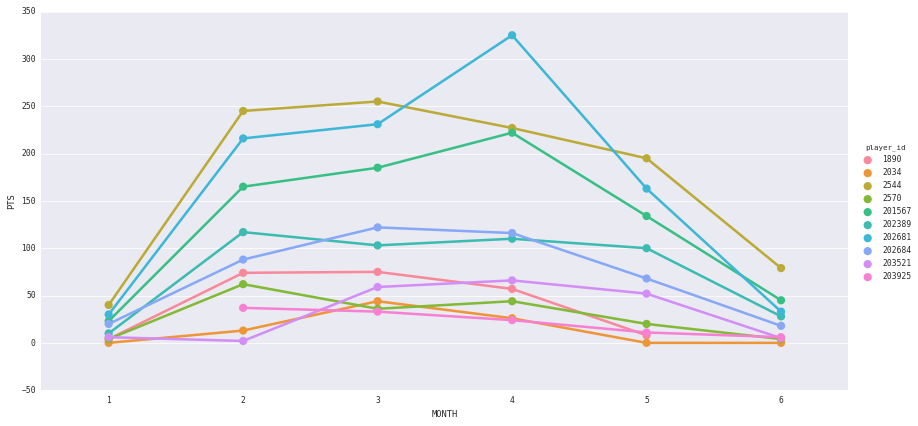

In [788]:
a = sns.factorplot(data = cavsmonths, x='MONTH', y='PTS', hue='player_id', size=6, aspect=2)

###### This analysis shows the drop in field goal points in the Season and therefore a possible trend to the loss of Cleveland Cavaliers against the Warriors in 2014 - 2015 playoffs.

## Team Analysis of Cleveland Cavaliers 

### All Team Members of the Cavs who took a shot 

###### All Shots by the Cavs

In [789]:
allcleshots = main_df[main_df['MATCHUP'].str.contains("CLE")]

###### Finding all Cavs Team Members 

In [790]:
allcleshots['AWAY'] = allcleshots['MATCHUP'].apply(lambda x:x.split()[4])
allcleshots['HOME'] = allcleshots['MATCHUP'].apply(lambda x:x.split()[6])

/Users/JohnAntony/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/JohnAntony/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [791]:
cavsshots = main_df[(main_df['player_id'] == 202681) | (main_df['player_id'] == 203521) | \
                   (main_df['player_id'] == 203925) | (main_df['player_id'] == 2544) | \
                  (main_df['player_id'] == 201567) | (main_df['player_id'] == 1890) | \
                  (main_df['player_id'] == 2034) | (main_df['player_id'] == 202389) | \
                  (main_df['player_id'] == 2570) | (main_df['player_id'] == 202684) ] 

cavsshots.player_name.unique()

array(['matthew dellavedova', 'kyrie irving', 'shawn marion',
       'lebron james', 'tristan thompson', 'kevin love', 'mike miller',
       'joe harris', 'timofey mozgov', 'kendrick perkins'], dtype=object)

In [792]:
cavsshots = cavsshots.replace(to_replace = 'missed', value = 0)
cavsshots = cavsshots.replace(to_replace = 'made', value = 1)

cavsshots.SHOT_RESULT.unique()

array([0, 1])

### Correlation between the shot distance and the shot result

In [793]:
cavscorr1 = pd.concat([cavsshots['SHOT_DIST'], cavsshots['SHOT_RESULT']], \
                         axis=1, keys=['SHOT_DIST', 'SHOT_RESULT'])
cavscorr1.corr()

,SHOT_DIST,SHOT_RESULT
SHOT_DIST,1.000000,-0.190821
SHOT_RESULT,-0.190821,1.000000


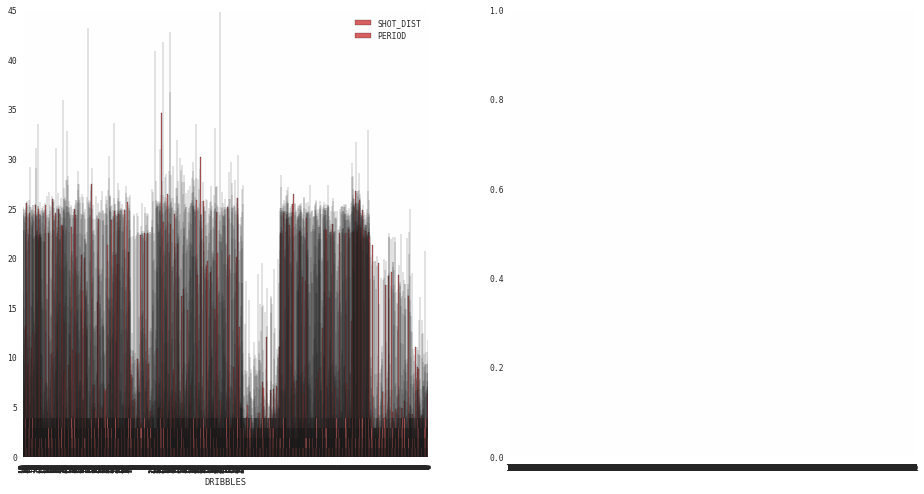

In [794]:
fig, (axis1,axis2) = plt.subplots(1,2, sharex=True,figsize=(16,8))
cavscorr1.plot('SHOT_RESULT', 'SHOT_DIST', kind= 'bar', ax=axis1, color = 'r')
cavsshots.plot('DRIBBLES', 'PERIOD', kind= 'bar', ax=axis1, color = 'r')